In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

import glob
import os

%matplotlib inline

# INTRODUCTION
Every Individual have their own wishes in their every stage of life .Sometimes that wish comes with a cost , In order to achieve it and balance it with their daily life.People go for loans .But ,Selection of a Loan is a very calculative decision because we have to manage expenses and set out priorities accordingly.
And This project is on a data set from Prosper, which is America’s first marketplace lending platform, with over $7 billion in funded loans. 


## DATA OVERVIEW
This data consist of 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, borrower employment status,Investors,Category Band, borrower credit history, and the latest payment information. The main purpose of this project is to summarize the characteristics of variables that can affect the loan status and to get some ideas about the relationships among multiple variables using summary statistics and data visualizations

# Importing the csv file

In [2]:
df=pd.read_csv('prosperLoanData.csv')

In [3]:
#checking the value
df.head(5)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
#checking about the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [5]:
df.info()
#have to convert the datatype of creation date
#loan as categorical 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null object
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null object
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
ProsperRating (Alpha) 

In [6]:
df.describe()
#checking the ranging of each and every value

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


df.ListingCreationDate = df.ListingCreationDate.astype(datetime)

In [7]:
#converting the datatype to datetime
df['ListingCreationDate'] = pd.to_datetime(df['ListingCreationDate'])
df['ClosedDate'] = pd.to_datetime(df['ClosedDate'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
ListingKey                             113937 non-null object
ListingNumber                          113937 non-null int64
ListingCreationDate                    113937 non-null datetime64[ns]
CreditGrade                            28953 non-null object
Term                                   113937 non-null int64
LoanStatus                             113937 non-null object
ClosedDate                             55089 non-null datetime64[ns]
BorrowerAPR                            113912 non-null float64
BorrowerRate                           113937 non-null float64
LenderYield                            113937 non-null float64
EstimatedEffectiveYield                84853 non-null float64
EstimatedLoss                          84853 non-null float64
EstimatedReturn                        84853 non-null float64
ProsperRating (numeric)                84853 non-null float64
Prospe

#checking for the duplicates
df.duplicates('ListingNumber')

In [8]:
#checking for the duplicates
df.duplicated('ListingKey').count()

113937

# univariate Analysis

In [9]:
Status=df.LoanStatus.value_counts()


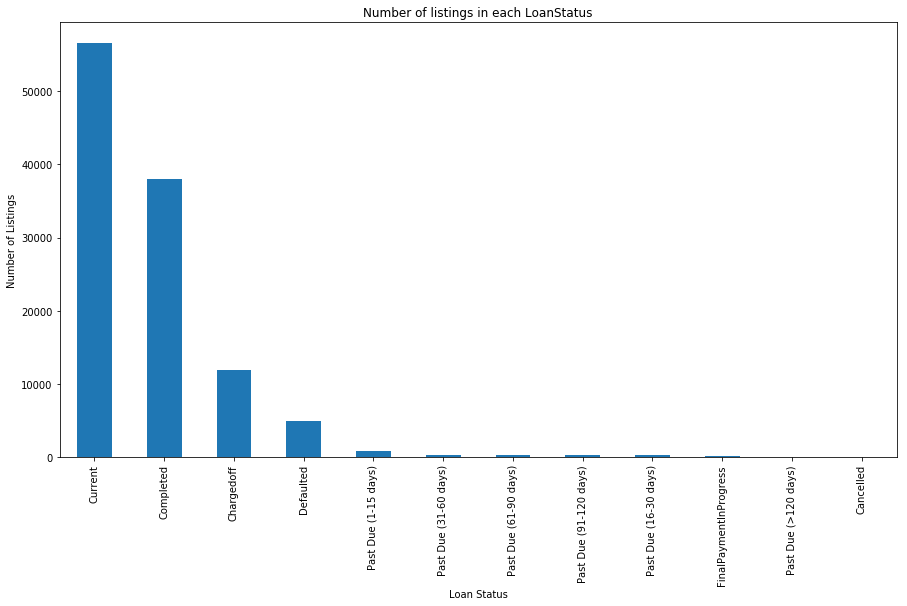

In [10]:
color = sns.color_palette()[0]

plt.figure(figsize=(15, 8))
Status.plot(kind='bar', color=color);

plt.title('Number of listings in each LoanStatus');
plt.xlabel('Loan Status');
plt.ylabel('Number of Listings');

plt.xticks(rotation=90);

## Current Loan Status
## INSIGHTS<br>
This graph shows the status of loans according to which nearly 500 loans are stated as default which can affect the total funding of bank.

## term wise distribution
the distribution of loan on the basis of the paying time (LOAN PERIOD)

In [11]:
term=df.Term.value_counts()

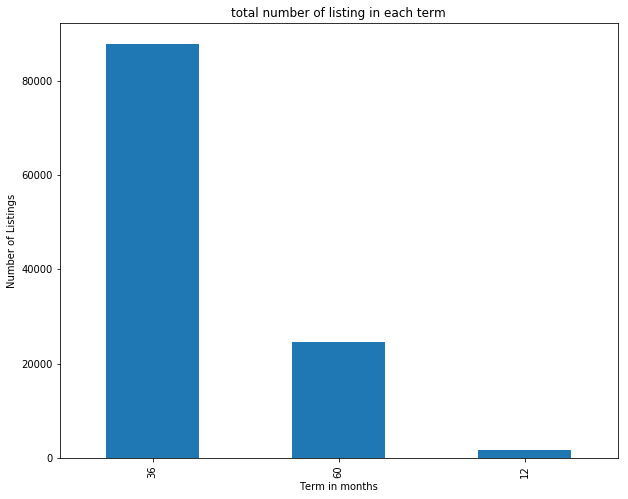

In [12]:
color = sns.color_palette()[0]

plt.figure(figsize=(10, 8))
term.plot(kind='bar', color=color);

plt.title('total number of listing in each term');
plt.xlabel('Term in months');
plt.ylabel('Number of Listings');

plt.xticks(rotation=90);

# INSIGHTS<br>
The above bar plot shows that people generally prefer loans which has paying tme of nearly 36 months.

In [13]:
df.Investors.describe()

count    113937.000000
mean         80.475228
std         103.239020
min           1.000000
25%           2.000000
50%          44.000000
75%         115.000000
max        1189.000000
Name: Investors, dtype: float64

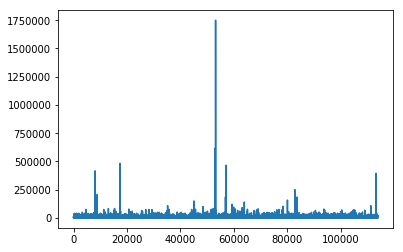

In [14]:
df.StatedMonthlyIncome.plot()

# Insights<br>
Though this histogram looks a little messy .But it clearly depicts one thing that ,The maximum loan takers have monthly 
incomes range between 45000-55000 (approximately)

In [15]:
Credit=df.CreditGrade.value_counts()

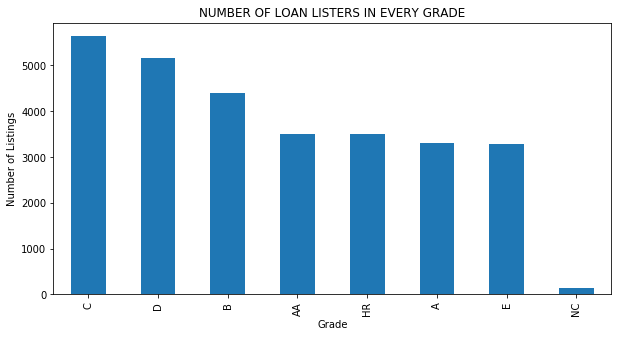

In [25]:
plt.figure(figsize=(10, 5))
Credit.plot(kind='bar', color=color);

plt.title('NUMBER OF LOAN LISTERS IN EVERY GRADE');
plt.xlabel('Grade');
plt.ylabel('Number of Listings');

plt.xticks(rotation=90);


# INSIGHTS
This bar graph depicts the total number of loan takers from every category.

# Bivariate analysis


Text(0.5,1,'Number of investors vs. BorrowerRate')

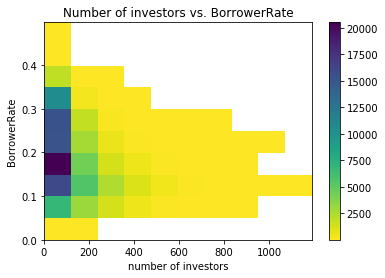

In [17]:
# for proper analysis keeping out the null degrees
df2 = df.loc[df.Investors.notnull()]

# plots the hist2d graph 
plt.hist2d(data=df2, x='Investors', y='BorrowerRate', cmap = 'viridis_r', cmin = 0.5);
plt.colorbar()

plt.xlabel('number of investors')
plt.ylabel('BorrowerRate')
plt.title('Number of investors vs. BorrowerRate')

# INSIGHTS
This plot depicts a clear picture between the number of investors and borrowing rate . But in the range between 0-100 .
They are all types of Borrowing rates are available but generally more than 200+ investors are consistently have gone with more than 0.1 Borrowing Rate

C:\Users\KUNTAL\Anaconda2\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


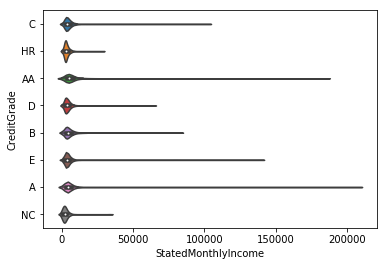

In [18]:
sns.violinplot(data = df, x = 'StatedMonthlyIncome', y = 'CreditGrade')

# INSIGHTS<br>
This plot shows an idea of stated monthly income stated by and Credit Grade officer .This Graph will help us to analyze the average salary of a person according to its grade.

In [19]:
 #fetching year from ListCretion
  #FOR FURTHER ANALYSIS FETCHNG YEAR IS NEEDED

In [20]:
df.ListingCreationDate.dt.year

0         2007
1         2014
2         2007
3         2012
4         2013
5         2013
6         2013
7         2013
8         2013
9         2013
10        2012
11        2007
12        2013
13        2013
14        2013
15        2012
16        2013
17        2006
18        2013
19        2013
20        2013
21        2007
22        2013
23        2013
24        2013
25        2013
26        2013
27        2010
28        2013
29        2013
          ... 
113907    2013
113908    2010
113909    2012
113910    2014
113911    2013
113912    2013
113913    2010
113914    2006
113915    2008
113916    2012
113917    2013
113918    2008
113919    2013
113920    2013
113921    2005
113922    2008
113923    2008
113924    2012
113925    2013
113926    2006
113927    2008
113928    2011
113929    2013
113930    2013
113931    2014
113932    2013
113933    2011
113934    2013
113935    2011
113936    2014
Name: ListingCreationDate, Length: 113937, dtype: int64

In [21]:
#creating a new dataframe for analysis so that the orignal copy donot get disturbed 
df2['prosper']=df['ProsperScore']
df2['year']=df['ListingCreationDate'].dt.year
df2['Borrower_Rate']=df['BorrowerRate']
df2['IsBorrowerHomeowner']=df['IsBorrowerHomeowner']
df2['Credit_Grade']=df['CreditGrade']
df2['Term']=df['Term']

Text(0.5,1,'Analysis of prosper rate per year')

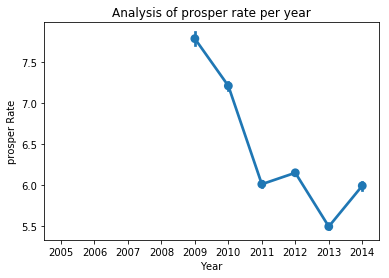

In [22]:
sns.pointplot(data=df2, x='year', y='prosper');
plt.xlabel('Year')
plt.ylabel('prosper Rate')
plt.title('Analysis of prosper rate per year')


# INSIGHTS<br>
Prosper Rate is decline continuously till 2011 and there is a sudden fall in the year 2010-2011 .
Some External factors might have affected the Prosper rate.

Text(0.5,1,'Analysis of Borrower  rate per year')

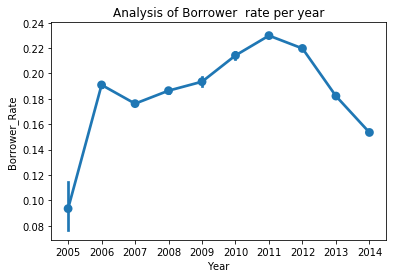

In [27]:
sns.pointplot(data=df2, x='year', y='Borrower_Rate');
plt.xlabel('Year')
plt.ylabel('Borrower_Rate')
plt.title('Analysis of Borrower  rate per year')


For analyzing Borrower rate through out the previous years .In 2006 there was a suuden hike in the Borrower_Rate.

# Multivariate Analysis
Analyzing the people's choices of loan on the basis of the term(Total Time Period) provided to repay the loan back.

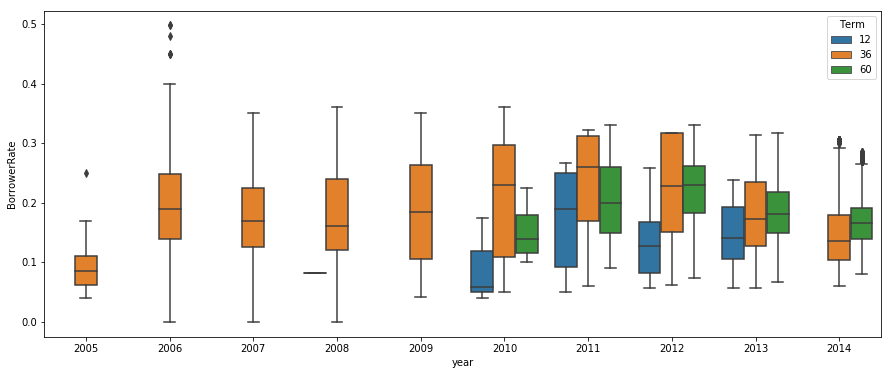

In [24]:
g = sns.boxplot(data=df2, x='year', y='BorrowerRate', hue='Term');
g.figure.set_figwidth(15)
g.figure.set_figheight(6)

# INSIGHTS 
This Plot depicts a clear scenario of past year trends, Early People mainly go for 36 months period with borrowing rate of 0.2 to 0.3 
but in the middle low borrowrate with 12 months was also preferred but in 2013 and 2014 only 36 months and 60 months period is preffered
